# **Assignment-12: TensorFlow and Keras: Build various MLP architectures for MNIST dataset [M]**


##### Objective:
* Model with three different architecture:
        
        1) 2-Hidden layer architecture (784-472-168-10 architecture)
        
        2) 3-Hidden layer architecture (784-352-164-124-10 architecture)
        
        3) 5-Hidden layer architecture (784-216-170-136-80-38-10 architecture)
        
* Train-Test error plot
* Activation='relu'+  Adam Optimizer+Batch_Normalization +Drop_out

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

x_train = x_train/255
x_test = x_test/255

In [9]:
# example data point after normlizing
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal


In [12]:
# some model parameters

output_dim = 10
input_dim = x_train.shape[1]

batch_size = 128 
nb_epoch = 20

# 1) 2-Hidden layer architecture (784-472-168-10 architecture)

## 1.1  MLP + ReLU + ADAM 

In [13]:
model_relu = Sequential()
model_relu.add(Dense(472, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(168, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history11 = model_relu.fit(x_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 472)               370520    
_________________________________________________________________
dense_2 (Dense)              (None, 168)               79464     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2342 - acc: 0.9321 - val_loss: 0.1046 - val_acc: 0.9690
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0859 - acc: 0.9736 - val_loss: 0.0847 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step 

Test score: 0.0804028440125881
Test accuracy: 0.9824


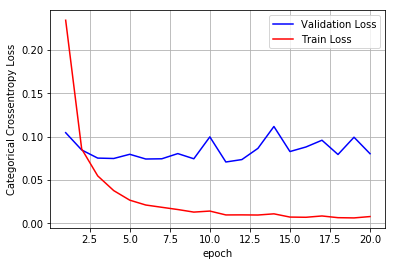

In [14]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
score1=score[0]
score2=score[1]
train_acc1=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax11 = plt.subplots(1,1)
ax11.set_xlabel('epoch') ; ax11.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy11 = history11.history['val_loss']
ty11 = history11.history['loss']
plt_dynamic(x, vy11, ty11, ax11)

## 1.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer 

In [15]:


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(472, activation='relu', 
                      input_shape=(input_dim,),
                      kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(168, activation='relu', 
                      kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 472)               370520    
_________________________________________________________________
batch_normalization_1 (Batch (None, 472)               1888      
_________________________________________________________________
dense_5 (Dense)              (None, 168)               79464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 168)               672       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1690      
Total params: 454,234
Trainable params: 452,954
Non-trainable params: 1,280
_________________________________________________________________


In [16]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history12 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1869 - acc: 0.9439 - val_loss: 0.1017 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0706 - acc: 0.9788 - val_loss: 0.0791 - val_acc: 0.9757
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0439 - acc: 0.9867 - val_loss: 0.0820 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0325 - acc: 0.9893 - val_loss: 0.0782 - val_acc: 0.9767
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0249 - acc: 0.9919 - val_loss: 0.0910 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0203 - acc: 0.9936 - val_loss: 0.0749 - val_acc: 0.9752
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.0861 - val_acc

Test score: 0.07902511259189378
Test accuracy: 0.9797


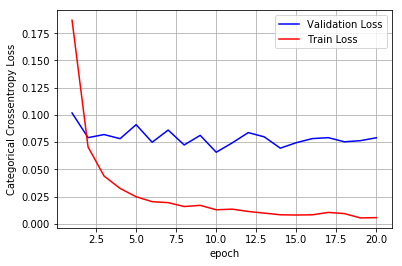

In [17]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
score3=score[0]
score4=score[1]
train_acc2=history11.history['acc']

fig,ax12 = plt.subplots(1,1)
ax12.set_xlabel('epoch') ; ax12.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy12 = history12.history['val_loss']
ty12 = history12.history['loss']
plt_dynamic(x, vy12, ty12, ax12)

## 1.3 MLP + Dropout + AdamOptimizer 

In [18]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(472, activation='relu',
                     input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(168, activation='relu',
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 472)               370520    
_________________________________________________________________
batch_normalization_3 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_1 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 168)               79464     
_________________________________________________________________
batch_normalization_4 (Batch (None, 168)               672       
_________________________________________________________________
dropout_2 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1690      
Total para

In [19]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history13 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.4343 - acc: 0.8696 - val_loss: 0.1400 - val_acc: 0.9560
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2069 - acc: 0.9376 - val_loss: 0.1039 - val_acc: 0.9668
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1648 - acc: 0.9501 - val_loss: 0.0917 - val_acc: 0.9695
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1389 - acc: 0.9583 - val_loss: 0.0773 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1204 - acc: 0.9626 - val_loss: 0.0778 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1042 - acc: 0.9674 - val_loss: 0.0693 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0984 - acc: 0.9691 - val_loss: 0.0708 - val_acc

Test score: 0.06363873664251878
Test accuracy: 0.982


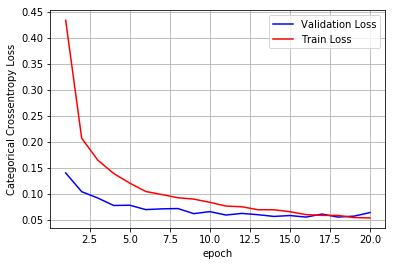

In [20]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax13.set_ylabel('Categorical Crossentropy Loss')

vy13 = history13.history['val_loss']
ty13 = history13.history['loss']
plt_dynamic(x, vy13, ty13, ax13)

# 2) 3-Hidden layer architecture (784-352-164-124 architecture)

## 2.1  MLP + ReLU + ADAM 

In [21]:
model_relu = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history21 = model_relu.fit(x_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 352)               276320    
_________________________________________________________________
dense_11 (Dense)             (None, 164)               57892     
_________________________________________________________________
dense_12 (Dense)             (None, 124)               20460     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1250      
Total params: 355,922
Trainable params: 355,922
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2384 - acc: 0.9297 - val_loss: 0.1191 - val_acc: 0.9635
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - los

Test score: 0.0930518318862476
Test accuracy: 0.9801


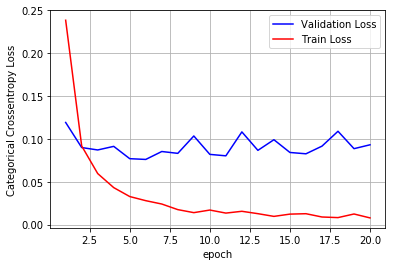

In [22]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
score7=score[0]
score8=score[1]
train_acc4=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax21 = plt.subplots(1,1)
ax21.set_xlabel('epoch') ; ax21.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy21 = history21.history['val_loss']
ty21 = history21.history['loss']
plt_dynamic(x, vy21, ty21, ax21)

<h2> 2.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [24]:


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))




In [25]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history22 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.4890 - acc: 0.8559 - val_loss: 0.8223 - val_acc: 0.7690
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3046 - acc: 0.9136 - val_loss: 0.6800 - val_acc: 0.8069
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2873 - acc: 0.9194 - val_loss: 1.3266 - val_acc: 0.6626
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2784 - acc: 0.9214 - val_loss: 1.2652 - val_acc: 0.6949
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2724 - acc: 0.9234 - val_loss: 0.7312 - val_acc: 0.8170
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2677 - acc: 0.9246 - val_loss: 2.0437 - val_acc: 0.5762
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2664 - acc: 0.9250 - val_loss: 1.6328 - val_acc

In [26]:
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 784)               3136      
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                7850      
Total params: 17,258
Trainable params: 12,554
Non-trainable params: 4,704
_________________________________________________________________


Test score: 0.6960192083239556
Test accuracy: 0.8508


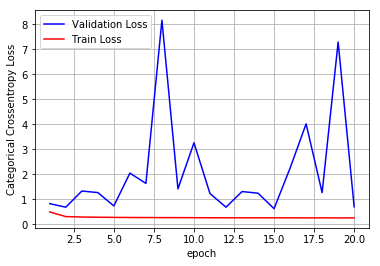

In [27]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
score9=score[0]
score10=score[1]
train_acc5=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax22 = plt.subplots(1,1)
ax22.set_xlabel('epoch') ; ax22.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy22 = history22.history['val_loss']
ty22 = history22.history['loss']
plt_dynamic(x, vy22, ty22, ax22)

## 2.3 MLP + Dropout + AdamOptimizer 

In [28]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))




In [29]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history23 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 1.3624 - acc: 0.5675 - val_loss: 0.5117 - val_acc: 0.8760
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.8656 - acc: 0.7185 - val_loss: 0.4472 - val_acc: 0.8913
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.8441 - acc: 0.7262 - val_loss: 0.4391 - val_acc: 0.8962
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.8296 - acc: 0.7280 - val_loss: 0.4273 - val_acc: 0.8928
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.8278 - acc: 0.7296 - val_loss: 0.4224 - val_acc: 0.8943
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.8288 - acc: 0.7291 - val_loss: 0.4213 - val_acc: 0.8978
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.8293 - acc: 0.7306 - val_loss: 0.4187 - val_acc

In [30]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                7850      
Total para

Test score: 0.40321056950092315
Test accuracy: 0.8992


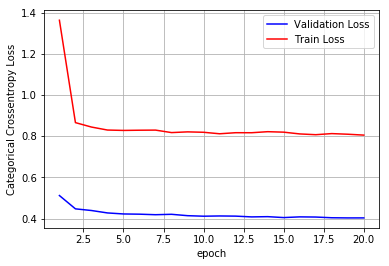

In [31]:
score = model_drop.evaluate(x_test, y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history23.history['val_loss']
ty23 = history23.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

# 3) 5-Hidden layer architecture (784-216-170-136-80-38-10 architecture)

## 3.1  MLP + ReLU + ADAM 

In [33]:
model_relu = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history31 = model_relu.fit(x_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 216)               169560    
_________________________________________________________________
dense_33 (Dense)             (None, 170)               36890     
_________________________________________________________________
dense_34 (Dense)             (None, 136)               23256     
_________________________________________________________________
dense_35 (Dense)             (None, 80)                10960     
_________________________________________________________________
dense_36 (Dense)             (None, 38)                3078      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                390       
Total params: 244,134
Trainable params: 244,134
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.08723179607167986
Test accuracy: 0.9816


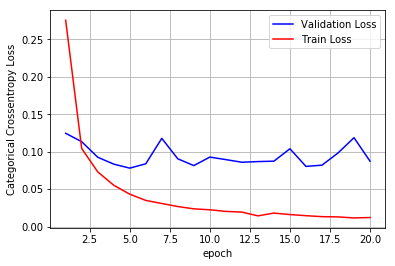

In [34]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
score13=score[0]
score14=score[1]
train_acc7=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax31 = plt.subplots(1,1)
ax31.set_xlabel('epoch') ; ax31.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy31 = history31.history['val_loss']
ty31 = history31.history['loss']
plt_dynamic(x, vy31, ty31, ax31)


<h2> 3.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [35]:


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))



In [36]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history32 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.4860 - acc: 0.8559 - val_loss: 14.5498 - val_acc: 0.0973
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3060 - acc: 0.9119 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2868 - acc: 0.9190 - val_loss: 14.2799 - val_acc: 0.1140
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2793 - acc: 0.9210 - val_loss: 14.2871 - val_acc: 0.1136
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2719 - acc: 0.9233 - val_loss: 14.5417 - val_acc: 0.0978
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2689 - acc: 0.9239 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 7/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2641 - acc: 0.9253 - val_loss: 14.5530 - 

In [37]:

model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_14 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_15 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_16 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_17 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_18 (Batc (None, 784)               3136      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                7850      
Total params: 23,530
Trainable params: 15,690
Non-trainable params: 7,840
_________________________________________________________________


Test score: 14.548192663574218
Test accuracy: 0.0974


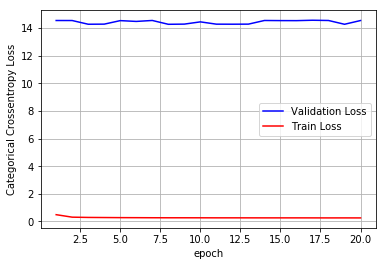

In [39]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
score15=score[0]
score16=score[1]
train_acc8=history32.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax32 = plt.subplots(1,1)
ax32.set_xlabel('epoch') ; ax32.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy32 = history32.history['val_loss']
ty32 = history32.history['loss']
plt_dynamic(x, vy32, ty32, ax32)

## 3.3 MLP + Dropout + AdamOptimizer 

In [40]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))




In [41]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history33 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 2.1378 - acc: 0.3107 - val_loss: 1.0547 - val_acc: 0.8325
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 1.6071 - acc: 0.4430 - val_loss: 0.9704 - val_acc: 0.8447
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 1.5920 - acc: 0.4488 - val_loss: 0.9579 - val_acc: 0.8452
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: 1.5923 - acc: 0.4474 - val_loss: 0.9549 - val_acc: 0.8456
Epoch 5/20
60000/60000 [==============================] - 5s 76us/step - loss: 1.5842 - acc: 0.4502 - val_loss: 0.9419 - val_acc: 0.8458
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 1.5851 - acc: 0.4478 - val_loss: 0.9492 - val_acc: 0.8455
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 1.5809 - acc: 0.4495 - val_loss: 0.9455 - val_ac

In [42]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_19 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_7 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_8 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 784)               3136      
__________

Test score: 0.9346290021896362
Test accuracy: 0.8529


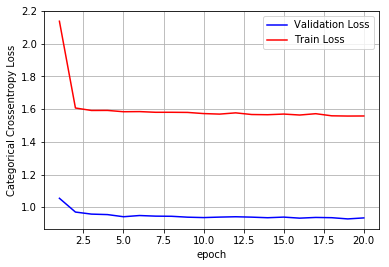

In [43]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history33.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

# Final observation:

In [44]:
from prettytable import PrettyTable

In [45]:
models=['2_hidden_layer MLP+ReLu+Adam',
        '2_hidden_layer MLP+Relu+adam+BN',
        '2_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '3_hidden_layer MLP+ReLu+Adam',
        '3_hidden_layer MLP+Relu+adam+BN',
        '3_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '5_hidden_layer MLP+ReLu+Adam',
        '5_hidden_layer MLP+Relu+adam+BN',
        '5_hidden_layer MLP+reLu+Adam+BN+Drop-out']

In [46]:
training_accuracy=[train_acc1,train_acc2,train_acc3,train_acc4,
                   train_acc5,train_acc6,train_acc7,train_acc8,
                   train_acc9
                   
                  ]

In [47]:
test_score=[score1,score3,score5,score7,score9,score11,score13,score15,
           score17]

In [48]:
test_accuracy=[score2,score4,score6,score8,score10,score12,score14,
              score16,
              score18]
INDEX = [1,2,3,4,5,6,7,8,9]

In [ ]:
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",training_accuracy)
Model_Performance.add_column("TESTING ACCURACY",test_accuracy)
Model_Performance.add_column("TEST SCORE",test_score)

# Printing the Model_Performance
print(Model_Performance)

+--------+------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+---------------------+
| INDEX. |                MODEL_NAME                |                                                                                                                                                                                                TRAINING ACCURACY                                                                                                                                                                                                 | TESTING ACCURACY |      TEST SCORE     |
+--------+------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+---------------------+
|   1    |       2_hidden_layer MLP+ReLu+Adam       |  0.9974 |      0.9824      |  0.0804028440125881 |
|   2    |     2_hidden_layer MLP+Relu+adam+BN      |  0.9974|      0.9797      | 0.07902511259189378 |
|   3    | 2_hidden_layer MLP+reLu+Adam+BN+Drop-out |   0.9974 |      0.982       | 0.06363873664251878 |
|   4    |       3_hidden_layer MLP+ReLu+Adam       | 0.9974 |      0.9801      |  0.0930518318862476 |
|   5    |     3_hidden_layer MLP+Relu+adam+BN      | 0.9974|      0.8508      |  0.6960192083239556 |
|   6    | 3_hidden_layer MLP+reLu+Adam+BN+Drop-out | 0.9974 |      0.8992      | 0.40321056950092315 |
|   7    |       5_hidden_layer MLP+ReLu+Adam       | 0.9974 |      0.9816      | 0.08723179607167986 |
|   8    |     5_hidden_layer MLP+Relu+adam+BN      | 0.9293    |      0.974      |  14.548192663574218 |
|   9    | 5_hidden_layer MLP+reLu+Adam+BN+Drop-out |  0.9345 |      0.8529      |  0.9346290021896362 |
+--------+------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+---------------------+